In [ ]:
!pip install textacy
!pip install keras_tuner
!pip install transformers torch
!pip install tensorflow
!pip install keras
!pip install nltk
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import os
import textacy
import textacy.preprocessing as tprep
import re
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Flatten, Conv2D
import seaborn as sns
import pickle
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import mean_absolute_error
from nltk.tokenize import word_tokenize, sent_tokenize
from keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")



In [ ]:
def merge_text_files(input_files, output_file):
    combined_content = ""
    for file in input_files:
        with open(file, 'r') as infile:
            combined_content += infile.read() + "\n"

    with open(output_file, 'w') as outfile:
        outfile.write(combined_content)

# Example usage
input_files = ['imdb_labelled.txt']# 'amazon_cells_labelled.txt', 'yelp_labelled.txt']
output_file = 'merged_file.txt'

merge_text_files(input_files, output_file)

In [ ]:
with open('merged_file.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
text1 = pd.DataFrame(text.split('\n'), columns=['text'])
text1.head(5)

,text
0,"A very, very, very slow-moving, aimless movie ..."
1,Not sure who was more lost - the flat characte...
2,Attempting artiness with black & white and cle...
3,Very little music or anything to speak of. \t0
4,The best scene in the movie was when Gerardo i...


In [ ]:
scores = []
with open('merged_file.txt', 'r', encoding='utf-8') as f:
    for line in f:  # Iterate through lines in the file
        try:
            score = int(line.strip().split('\t')[1])  # Extract score if tab is present
            scores.append(score)
        except IndexError:
            pass  # Skip lines without tab or score


scores = pd.Series(scores, name='labels')



In [ ]:
non_ascii = [char for char in text if ord(char) > 127]
non_ascii_count = len(non_ascii)
print(f" There are {non_ascii_count} non-ASCII characters in the text.")


 There are 13 non-ASCII characters in the text.


In [ ]:
def normalize_text(text):
    # Normalize unicode characters
    text = tprep.normalize.unicode(text)

    # Remove accents
    text = tprep.remove.accents(text)

    # Remove non-alphanumeric characters
    text = tprep.remove.punctuation(text)

    return text

# Application
normalized_text = normalize_text(text)



In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# Lemmatization and stopword removal
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = text.lower().split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

preprocessed_texts = [preprocess_text(text) for text in text]

from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenization and sequencing
tokens = word_tokenize(text.lower())
#sequences = tokenizer.texts_to_sequences(preprocessed_texts)

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'normalized' from the previous cell contains the tokenized and lemmatized words
# Convert the normalized words to numerical sequences using a tokenizer.

# Create a tokenizer and fit it on your text dat

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_texts)  # Fit the tokenizer on your text data




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import re

def split_text_by_label(text):
    """Splits text into documents based on label (0 or 1).

    Args:
        text: The input text string.

    Returns:
        A list of text documents.
    """
    # Split by label (assuming label is followed by a tab or space)
    documents = re.split(r'\n| ', text)

    # Remove empty strings and numerical labels from the list
    # and join the remaining parts to form the documents
    documents = [doc for doc in documents if doc and not doc.isdigit()]

    # Group consecutive elements in the list to form complete documents
    # Each document is separated by a label, so we need to pair them back together
    documents = [' '.join(documents[i:i+1]) for i in range(0, len(documents))]

    return documents

# Example usage:
documents = split_text_by_label(text)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)  # Pass the list of documents
vocab_size = len(vectorizer.vocabulary_)

In [ ]:

def tokenize(text):
    tokens = word_tokenize(normalize_text(text))
    return [WordNetLemmatizer().lemmatize(t) for t in tokens if t.isalnum()]

tokenized_text = tokenize(text)

print("Tokenized:", tokenized_text)


Tokenized: ['A', 'very', 'very', 'very', 'slow', 'moving', 'aimless', 'movie', 'about', 'a', 'distressed', 'drifting', 'young', 'man', '0', 'Not', 'sure', 'who', 'wa', 'more', 'lost', 'the', 'flat', 'character', 'or', 'the', 'audience', 'nearly', 'half', 'of', 'whom', 'walked', 'out', '0', 'Attempting', 'artiness', 'with', 'black', 'white', 'and', 'clever', 'camera', 'angle', 'the', 'movie', 'disappointed', 'became', 'even', 'more', 'ridiculous', 'a', 'the', 'acting', 'wa', 'poor', 'and', 'the', 'plot', 'and', 'line', 'almost', 'non', 'existent', '0', 'Very', 'little', 'music', 'or', 'anything', 'to', 'speak', 'of', '0', 'The', 'best', 'scene', 'in', 'the', 'movie', 'wa', 'when', 'Gerardo', 'is', 'trying', 'to', 'find', 'a', 'song', 'that', 'keep', 'running', 'through', 'his', 'head', '1', 'The', 'rest', 'of', 'the', 'movie', 'lack', 'art', 'charm', 'meaning', 'If', 'it', 's', 'about', 'emptiness', 'it', 'work', 'I', 'guess', 'because', 'it', 's', 'empty', '0', 'Wasted', 'two', 'hour',

In [ ]:
labels_text = ['positive', 'negative']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels_text)
print(encoded_labels)

[1 0]


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_sentiment_label(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.00:
        #df['labels'] = 1
        return 1
    else: #scores['compound'] <= 0.00:
        #df['labels'] = 0
        return 0
    #else:
        #return 'Neutral'

# Create a DataFrame with the 'text' column
# Instead of passing 'text' directly, create a list of sentences
sentences = sent_tokenize(text)  # Split the text into sentences
df = pd.DataFrame({'text': sentences})  # Create DataFrame with sentences

# Apply sentiment analysis
df['sentiment_label'] = df['text'].apply(get_sentiment_label)

df.head(5)

labels = df['sentiment_label']


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sentences = sent_tokenize(text)  # Split the text into sentences
df = pd.DataFrame({'text': sentences})  # Create DataFrame with sentences

# Apply sentiment analysis
df['sentiment_label'] = scores

df.head(5)



,text,sentiment_label
0,"A very, very, very slow-moving, aimless movie ...",0
1,0\nNot sure who was more lost - the flat chara...,0
2,0\nAttempting artiness with black & white and ...,0
3,0\nVery little music or anything to speak of.,0
4,0\nThe best scene in the movie was when Gerard...,1


In [ ]:
max_length = df['text'].str.len().max()
max_length

479

In [ ]:
sentiments = df['sentiment_label']

# Instead of using preprocessed_texts, use the text from the DataFrame:
sequences = tokenizer.texts_to_sequences(df['text'].tolist())

# Pad the sequences
padded = pad_sequences(sequences, maxlen=479, padding='pre', truncating='post')

# Padding sequences
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Split data (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(padded,sentiments, test_size=0.3, random_state=42)  # Use df['sentiment_label'] for labels
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)


In [ ]:
padded_sequences[1]

array([14,  0,  0], dtype=int32)

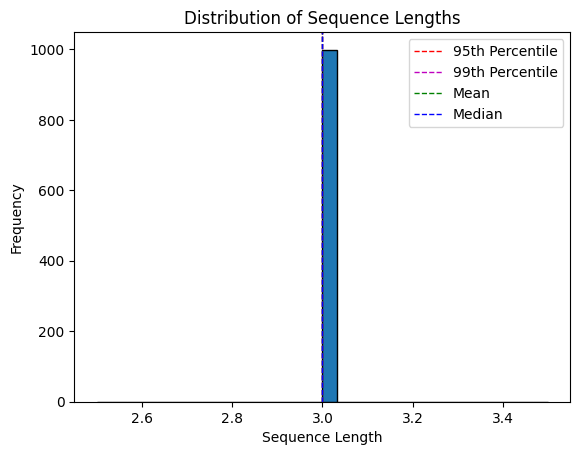

Mean length: 3.00
Median length: 3.00
95th percentile: 3.00
99th percentile: 3.00
Max length: 3
Chosen maximum sequence length: 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Replace this with your actual sequence length data
sequence_lengths = [len(seq) for seq in padded_sequences]

# Calculate statistics
mean_length = np.mean(sequence_lengths)
median_length = np.median(sequence_lengths)
max_length = np.max(sequence_lengths)
percentile_95 = np.percentile(sequence_lengths, 95)
percentile_99 = np.percentile(sequence_lengths, 99)

# Visualize the distribution
plt.hist(sequence_lengths, bins=30, edgecolor='k')
plt.axvline(percentile_95, color='r', linestyle='dashed', linewidth=1, label='95th Percentile')
plt.axvline(percentile_99, color='m', linestyle='dashed', linewidth=1, label='99th Percentile')
plt.axvline(mean_length, color='g', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_length, color='b', linestyle='dashed', linewidth=1, label='Median')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Mean length: {mean_length:.2f}")
print(f"Median length: {median_length:.2f}")
print(f"95th percentile: {percentile_95:.2f}")
print(f"99th percentile: {percentile_99:.2f}")
print(f"Max length: {max_length}")

# Choose maximum sequence length
max_sequence_length = int(percentile_99)  # You can adjust this based on your needs
print(f"Chosen maximum sequence length: {max_sequence_length}")

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

model = Sequential()

max_sequence_length = X_train.shape[1]

model.add(tf.keras.layers.Reshape((max_sequence_length, 1), input_shape=(max_sequence_length,)))

model.add(Bidirectional(LSTM(units=128, return_sequences=True, recurrent_dropout=0.2)))  # Change return_sequences to True

model.add(LSTM(units=65, return_sequences=False)) #removed duplicate return_sequences argument

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'AUC'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 936ms/step - AUC: 0.4230 - accuracy: 0.5152 - loss: 0.0000e+00 - val_AUC: 0.4909 - val_accuracy: 0.5600 - val_loss: 0.0000e+00
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 751ms/step - AUC: 0.4890 - accuracy: 0.4917 - loss: 0.0000e+00 - val_AUC: 0.5000 - val_accuracy: 0.5600 - val_loss: 0.0000e+00
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 707ms/step - AUC: 0.5000 - accuracy: 0.4908 - loss: 0.0000e+00 - val_AUC: 0.5000 - val_accuracy: 0.5600 - val_loss: 0.0000e+00
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 689ms/step - AUC: 0.5000 - accuracy: 0.4754 - loss: 0.0000e+00 - val_AUC: 0.5000 - val_accuracy: 0.5600 - val_loss: 0.0000e+00
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 707ms/step - AUC: 0.5000 - accuracy: 0.5138 - loss: 0.0000e+00 - val_AUC: 0.5000 - val_accuracy: 0.5600 - val_loss: 0.0000e+00


In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.Sequential()
    #model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

    # Tune the number of filters
    filters = hp.Int('filters', min_value=32, max_value=256, step=32)

    # Get the input shape from X_train
    input_shape = X_train.shape[1:]  # Get the shape excluding the batch size

    # Reshape input data dynamically based on X_train shape
    model.add(tf.keras.layers.Reshape((input_shape[0], 1), input_shape=input_shape))


    model.add(GlobalMaxPooling1D())

    # Tune the number of dense units
    units = hp.Int('units', min_value=1, max_value=126, step=32)
    model.add(Dense(units, activation='relu'))


    # Tune the dropout rate
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=5,
    factor=3,
    directory='my_dir',
    project_name='text_cnn_tuning'
)

tuner.search(X_train, y_train, epochs=3, validation_data=(X_val, y_val))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.4399999976158142

Best val_accuracy So Far: 0.5600000023841858
Total elapsed time: 00h 00m 23s
Best hyperparameters: {'filters': 192, 'units': 1, 'dropout': 0.0, 'learning_rate': 0.0003711901475345014, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}


In [ ]:
from keras import optimizers

vocab_size = 5133  # Size of your vocabulary
embedding_dim = 1  # Embedding dimension
max_length = 200  # Maximum length of input sequences

modelrev = Sequential()

max_sequence_length = X_train.shape[1]

# Embedding layer should be added before the LSTM layers
modelrev.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length)) # Add Embedding layer here

modelrev.add(tf.keras.layers.Reshape((max_sequence_length, 1), input_shape=(max_sequence_length,)))

modelrev.add(Bidirectional(LSTM(units=256, return_sequences=True, recurrent_dropout=0.1)))

modelrev.add(LSTM(units=65, return_sequences=False))

modelrev.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.0022559447282506848)
modelrev.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 'AUC'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
history = modelrev.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/2
22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - AUC: 0.5143 - accuracy: 0.5042 - loss: 0.6903 - val_AUC: 0.8740 - val_accuracy: 0.8600 - val_loss: 0.4343
Epoch 2/2
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - AUC: 0.8383 - accuracy: 0.8408 - loss: 0.4647 - val_AUC: 0.8734 - val_accuracy: 0.8667 - val_loss: 0.3886


In [ ]:
predictions_rev = modelrev.predict(X_test)



5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 399ms/step


In [ ]:
# Predict sentiment
# Get the maximum sequence length from X_train (or X_val if used during training)

# Make sure padded_sequences has the correct shape for the model
# Reshape or pad/truncate the sequences to match the expected input shape

# Assuming 'tokenizer' is the Tokenizer used during training
sequences = tokenizer.texts_to_sequences(df['text'].tolist())  # Assuming df is the correct DataFrame

# Pad the sequences to the correct length
padded_sequences_correct = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Use the correctly shaped input for prediction
predictions = model.predict(padded_sequences_correct)

#predictions_rev = modelrev.predict(padded_sequences_correct)
predictions_rev = modelrev.predict(padded_sequences_correct)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step


In [ ]:
# Now, recalculate sentiments based on the new predictions
sentiments = []
# Now, recalculate sentiments based on the new predictions
sentiments = []
sentiment_values = []

for prediction_rev_single in predictions_rev:
    if prediction_rev_single > 0.501:
        sentiment = "Positive"
        sentiment_value = 1
    else:
        sentiment = "Negative"
        sentiment_value = 0
    sentiments.append(sentiment)
    sentiment_values.append(sentiment_value)

# Create a new column 'predicted_sentiment' in the DataFrame
# Finally, assign the 'sentiments' to the new column
df['predicted_sentiment'] = sentiments
df['sentiment_value'] = sentiment_values

predicted_sentiment = df[['text', 'predicted_sentiment', 'sentiment_value']]


In [ ]:
predicted_sentiment

,text,predicted_sentiment,sentiment_value
0,"A very, very, very slow-moving, aimless movie ...",Negative,0
1,0\nNot sure who was more lost - the flat chara...,Negative,0
2,0\nAttempting artiness with black & white and ...,Negative,0
3,0\nVery little music or anything to speak of.,Negative,0
4,0\nThe best scene in the movie was when Gerard...,Negative,0
...,...,...,...
994,"0\nUnfortunately, any virtue in this film's pr...",Negative,0
995,"0\nIn a word, it is embarrassing.",Negative,0
996,0\nExceptionally bad!,Negative,0
997,0\nAll in all its an insult to one's intellige...,Negative,0


In [ ]:
for text, predictions_rev in zip(df['sentiment_value'].tolist(), predictions_rev):
    # Access the prediction value for the current sentence
    sentiment = "Positive" if predictions_rev > 0.501 else "Negative"
    #print(f"Text: {text} => Sentiment: {sentiment}")

In [ ]:
# Evaluate the model

# Instead of using a single prediction, use the model to predict on X_test
predicted_labels = (modelrev.predict(X_test) > 0.5).astype(int)

# Reshape to (n_samples, 1) if needed
predicted_labels = predicted_labels.reshape(-1, 1)

# Access the underlying NumPy array using .values before reshaping
y_test_array = y_test.values  # Extract the values of the pandas Series as a NumPy array
y_test_array = y_test_array.reshape(-1, 1)  # Reshape to (n_samples, 1)

# Ensure predicted_labels and y_test have the same number of samples
predicted_labels = predicted_labels[:len(y_test_array)]

# Now you can use accuracy_score and classification_report
from sklearn.metrics import accuracy_score, classification_report  # Import necessary functions

# Calculate accuracy using y_test_array as the actual labels
accuracy = accuracy_score(y_test_array, predicted_labels)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_array, predicted_labels))

# Compute MAE using true labels and predictions
mae = mean_absolute_error(y_test_array, predicted_labels)
print(f"Mean Absolute Error: {mae}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step
Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        65
           1       0.85      0.82      0.84        85

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150

Mean Absolute Error: 0.18


In [ ]:
modelrev.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 479, 1)              │           5,133 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 479, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 479, 512)            │         528,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 65)                  │         150,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,051,591 (7.83 MB)

 Trainable params: 683,863 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,367,728 (5.22 MB)

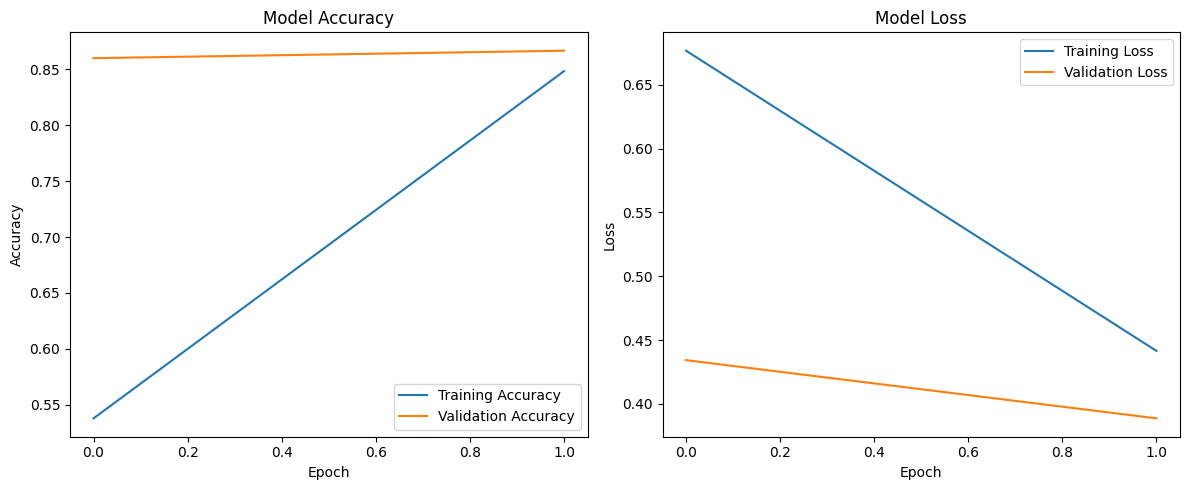

In [ ]:

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(f"The size of the vocabulary is {vocab_size}")

The size of the vocabulary is 5133


In [ ]:
modelrev.save('merged_model.keras')

In [ ]:
import pandas as pd  # Import pandas if not already imported

# Convert NumPy arrays to pandas DataFrames before saving to CSV
#pd.DataFrame(X_train).to_csv('X_train_sentiment.csv', index=False)
#pd.DataFrame(X_test).to_csv('X_test_sentiment.csv', index=False)
#pd.DataFrame(X_val).to_csv('X_val_sentiment.csv', index=False)

# y_train, y_test, and y_val are already pandas Series, so they can be saved directly
#y_train.to_csv('y_train_sentiment.csv', index=False)
#y_test.to_csv('y_test_sentiment.csv', index=False)
#y_val.to_csv('y_val_sentiment.csv', index=False)

In [ ]:
predicted_sentiment.loc[1:, 'text'] = df.loc[1:, 'text'].str[2:]
predicted_sentiment.to_csv('predicted_sentiment.csv', index=False)



In [ ]:
padded_sequences

array([[ 0,  0,  0],
       [14,  0,  0],
       [14,  0,  0],
       ...,
       [14,  0,  0],
       [14,  0,  0],
       [14,  0,  0]], dtype=int32)

In [ ]:
np.size(padded_sequences)


2997

In [ ]:
print(len(preprocessed_texts))

85273


In [52]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import string



# Step 2: Clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

text1['cleaned_text'] = text1['text'].apply(clean_text)

# Step 3: Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text1['cleaned_text'])

# Add tokenized sequences to dataframe
text1['tokenized'] = tokenizer.texts_to_sequences(text1['cleaned_text'])

# Step 4: Pad sequences to ensure uniform length
# Calculate max length or set a fixed length
max_length = max([len(seq) for seq in text1['tokenized']])
# Or set a fixed length: max_length = 10

# Add padded sequences to dataframe
text1['padded'] = pad_sequences(text1['tokenized'], maxlen=max_length, padding='post').tolist()

# Add scores to the dataframe
text1['scores'] = scores

print("\nVocabulary size:", len(tokenizer.word_index))
print("Word index:", tokenizer.word_index)
text1.to_csv('text1.csv', index=False)


Vocabulary size: 3124
Word index: {'the': 1, 'a': 2, 'and': 3, 'of': 4, 'is': 5, 'this': 6, 'i': 7, 'it': 8, 'to': 9, 'in': 10, 'was': 11, 'movie': 12, 'that': 13, 'film': 14, 'for': 15, 'as': 16, 'but': 17, 'with': 18, 'its': 19, 'one': 20, 'on': 21, 'you': 22, 'are': 23, 'not': 24, 'bad': 25, 'very': 26, 'just': 27, 'so': 28, 'all': 29, 'good': 30, 'at': 31, 'an': 32, 'there': 33, 'about': 34, 'be': 35, 'by': 36, 'have': 37, 'like': 38, 'from': 39, 'if': 40, 'time': 41, 'acting': 42, 'his': 43, 'really': 44, 'or': 45, 'out': 46, 'great': 47, 'even': 48, 'who': 49, 'were': 50, 'he': 51, 'has': 52, 'characters': 53, 'see': 54, 'my': 55, 'most': 56, 'how': 57, 'more': 58, 'no': 59, 'well': 60, 'only': 61, 'movies': 62, 'ever': 63, 'story': 64, 'plot': 65, 'when': 66, 'made': 67, 'some': 68, 'films': 69, 'they': 70, 'dont': 71, 'best': 72, 'because': 73, 'your': 74, 'also': 75, 'can': 76, 'than': 77, 'script': 78, 'other': 79, 'seen': 80, 'way': 81, 'love': 82, 'character': 83, 'make': 

In [53]:
text1.head()


,text,cleaned_text,tokenized,padded,scores
0,"A very, very, very slow-moving, aimless movie ...",a very very very slowmoving aimless movie abou...,"[2, 26, 26, 26, 1167, 1168, 12, 34, 2, 1169, 1...","[2, 26, 26, 26, 1167, 1168, 12, 34, 2, 1169, 1...",0.0
1,Not sure who was more lost - the flat characte...,not sure who was more lost the flat characters...,"[24, 508, 49, 11, 58, 395, 1, 706, 53, 45, 1, ...","[24, 508, 49, 11, 58, 395, 1, 706, 53, 45, 1, ...",0.0
2,Attempting artiness with black & white and cle...,attempting artiness with black white and cleve...,"[1172, 1173, 18, 200, 225, 3, 329, 226, 709, 1...","[1172, 1173, 18, 200, 225, 3, 329, 226, 709, 1...",0.0
3,Very little music or anything to speak of. \t0,very little music or anything to speak of,"[26, 111, 138, 45, 251, 9, 509, 4]","[26, 111, 138, 45, 251, 9, 509, 4, 0, 0, 0, 0,...",0.0
4,The best scene in the movie was when Gerardo i...,the best scene in the movie was when gerardo i...,"[1, 72, 125, 10, 1, 12, 11, 66, 1175, 5, 396, ...","[1, 72, 125, 10, 1, 12, 11, 66, 1175, 5, 396, ...",1.0


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

vocab_size = 5133  # Size of your vocabulary
embedding_dim = 100  # Increased embedding dimension
max_sequence_length = X_train.shape[1]  # Maximum length of input sequences

modelrev = Sequential()

# Embedding layer takes integer sequences as input
modelrev.add(Embedding(input_dim=vocab_size,
                      output_dim=embedding_dim,
                      input_length=max_sequence_length))

# No need for Reshape - Embedding output shape is (batch_size, max_sequence_length, embedding_dim)

# First Bidirectional LSTM layer
modelrev.add(Bidirectional(LSTM(units=256,
                               return_sequences=True,
                               recurrent_dropout=0.1)))

# Second LSTM layer
modelrev.add(LSTM(units=64,
                 return_sequences=False))

# Optional dropout for regularization
modelrev.add(Dropout(0.3))

# Output layer for binary classification
modelrev.add(Dense(1, activation='sigmoid'))

# Optimizer with specific learning rate
optimizer = optimizers.Adam(learning_rate=0.0022559447282506848)

# Compile with binary crossentropy for binary classification
modelrev.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy', 'AUC'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

# Train the model
history = modelrev.fit(X_train, y_train,
                      batch_size=32,
                      epochs=2,
                      validation_data=(X_val, y_val),
                      callbacks=[early_stopping])

Epoch 1/2
22/22 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - AUC: 0.7094 - accuracy: 0.6854 - loss: 0.6086 - val_AUC: 0.8732 - val_accuracy: 0.8600 - val_loss: 0.4110
Epoch 2/2
22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - AUC: 0.8384 - accuracy: 0.8488 - loss: 0.4393 - val_AUC: 0.8734 - val_accuracy: 0.8600 - val_loss: 0.4046
